<a href="https://www.kaggle.com/code/hattoriyoung/skin-cancer-classification?scriptVersionId=194840866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Dataset

## *Skin Cancer: Malignant vs Benign*

This dataset contains a balanced dataset of images of benign skin moles and malignant skin moles.

### *Content*

The data consists of two folders with each 1800 pictures (224x244) of the two types of moles.

### *Acknowledgements*

All the rights of the Data are bound to the ISIC-Archive rights (https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main). 

In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search fastbook

The basic steps:

* Upload the benign photos
* Upload the maligant photos
* Fine tune pre-trained neural network model to recognise the 2 groups
* Try running some individual photos to extrapolate

## Step 1: Import .jpg Photos



In [2]:
from fastai.imports import *
from fastai.vision.all import *
from pathlib import Path

path = Path("/kaggle/input/skin-cancer-data/data")

assert path.exists(), f"The {path} does not exist" # Check if the path of the data exist. 

## Step 2: Train Our Model

1. item_tfms = RandomResizedCrop(224, min_scale = 0.5)

* This line defines an item-level transformation where each image is randomly cropped to a size of 224x224 pixels. The min_scale=0.5 parameter specifies that the cropped area must be at least 50% of the area of the original image. This transformation is applied to each individual image in the dataset before any batch-level transformations.

2. batch_tfms = aug_transforms(size = 224, min_scale = 0.75, flip_vert=True, max_rotate=30, max_zoom=1.1, max_lighting=0.2, max_warp=0.2)

* The augmentation transformations include:
    + Resizing all images in a batch to 224x224 pixels.
    + Ensuring a minimum scale of 75% of the original image.
    + Vertical flipping of images.
    + Rotating images by up to ±30 degrees.
    + Zooming images by up to 10%.
    + Adjusting image brightness and contrast by up to 20%.
    + Applying perspective warping of up to 20%.

3. dls = ImageDataLoaders.from_folder(...)

* This function creates a DataLoaders object from images stored in a folder. The parameters specify how to locate and organize the images:
    + path: The directory path that contains the images.
    + test_name="test": Specifies a subfolder named "test" that contains test images.
    + valid_pct=0.2: Randomly selects 20% of the images to be used as the validation set.
    + item_tfms: The item transformations defined earlier are applied.
    + batch_tfms: The batch transformations defined earlier are applied.

4. dls.show_batch(max_n = 20)

* This line displays a batch of images from the dataset. The max_n = 20 parameter specifies that up to 20 images from the batch are displayed, showcasing the effects of the transformations applied. This is useful for visual inspection to ensure that the transformations are appropriate and the data is correctly processed before training a model.

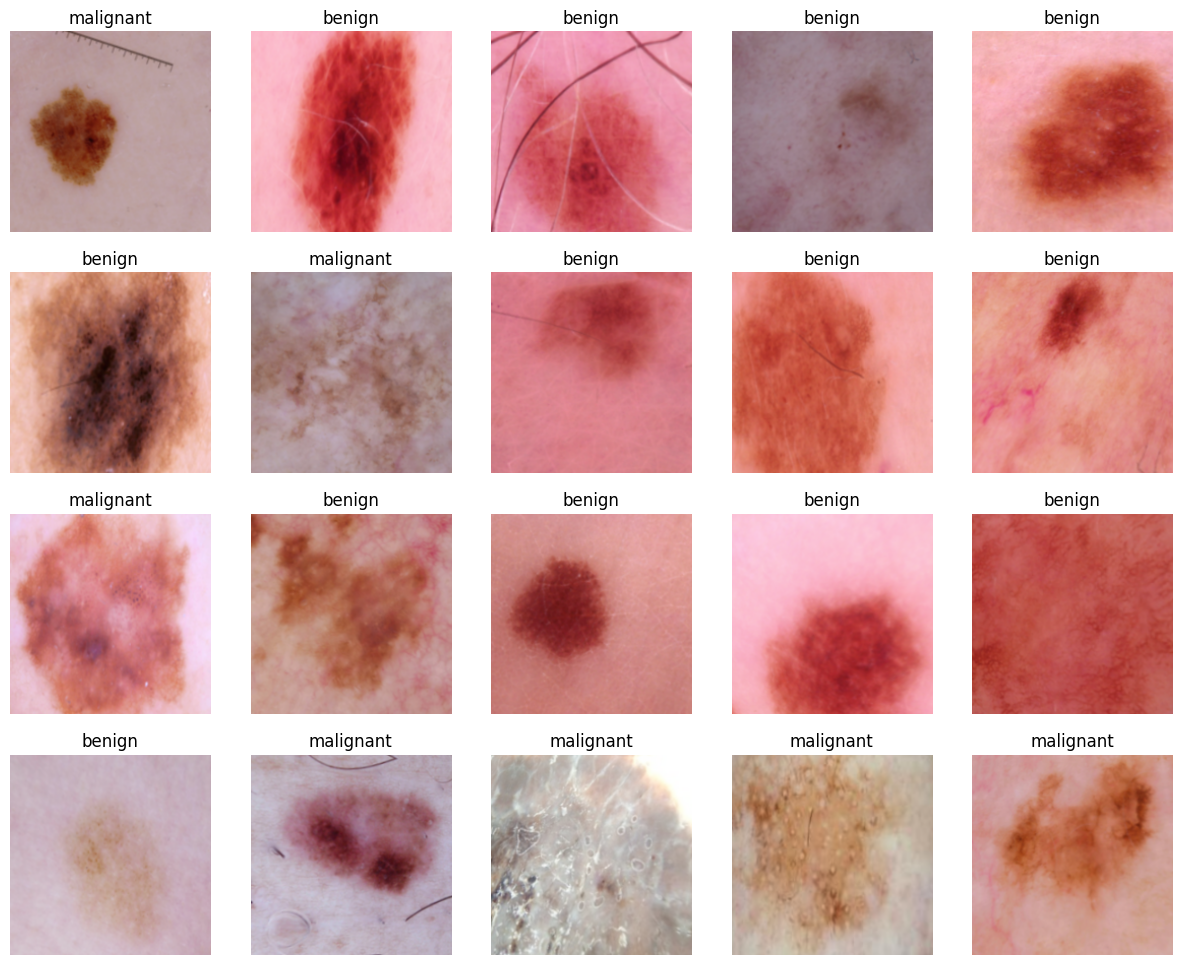

In [3]:
item_tfms = RandomResizedCrop(224, min_scale = 0.5)
batch_tfms = aug_transforms(size = 224, min_scale = 0.75,flip_vert=True, max_rotate=30, max_zoom=1.1, max_lighting=0.2, max_warp=0.2) 

dls = ImageDataLoaders.from_folder(
    path,
    test_name = "test",
    valid_pct=0.2,  # No need for a validation split since 'valid' is specified, but we set it as 20%
    item_tfms = item_tfms,  # Resize images to 224x224 pixels
    batch_tfms=batch_tfms  # Data augmentation and resize to 224x224 for training
)

dls.show_batch(max_n = 20)

## Step 3: Evaluate the Model

1. learn = vision_learner(dls, resnet18, metrics=[error_rate, accuracy])

* This line creates a learner object for deep learning using the vision_learner function from fastai. The function is designed to facilitate the creation and training of a computer vision model.
    + dls: This is the DataLoaders object that contains the training and validation data, prepared earlier with transformations and organized into batches.
    + resnet18: Specifies the model architecture to be used, in this case, ResNet-18. ResNet-18 is a popular convolutional neural network (CNN) that is relatively lightweight and efficient, making it suitable for a variety of image classification tasks. Refer to [here](http://https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html)
    + metrics=[error_rate, accuracy]: This sets the performance metrics to be evaluated during training. error_rate is the proportion of incorrect predictions, and accuracy is the proportion of correct predictions. These metrics help in monitoring the model's performance and are calculated for both the training and validation datasets during the training process.

2. learn.fine_tune(20)

* This line initiates the training process of the model using fine-tuning. Fine-tuning is a common technique in deep learning where a pre-trained model (like ResNet-18, which is typically pre-trained on a large dataset like ImageNet) is adjusted or "fine-tuned" to work on a specific, often smaller, dataset. 20: Specifies the number of epochs to run the fine-tuning process. An epoch is a complete pass through the entire dataset. During these 20 epochs, the model will adjust its weights and biases to minimize the error on the training dataset while also validating its performance on the validation dataset.

In [4]:
learn = vision_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(20)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 200MB/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.762562,0.532797,0.182094,0.817906,00:09


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.560362,0.417504,0.157815,0.842185,00:07
1,0.503651,0.320912,0.141123,0.858877,00:07
2,0.454543,0.337679,0.136571,0.863429,00:07
3,0.419854,0.273076,0.112291,0.887709,00:07
4,0.377894,0.288747,0.130501,0.869499,00:07
5,0.338937,0.273516,0.103187,0.896813,00:07
6,0.306744,0.252968,0.098634,0.901366,00:07
7,0.284094,0.238868,0.116844,0.883156,00:07
8,0.262439,0.268647,0.115326,0.884674,00:07
9,0.237869,0.249411,0.110774,0.889226,00:07


In [5]:
# learn.validate(0) The metrics of avg loss of the train data
learn.validate(1) # The metrics of avg loss of the test data

(#3) [0.23240932822227478,0.07587253302335739,0.924127459526062]

## Step 4: Use the Model

1. PILImage.create(Path("...")):

PILImage.create() is a function from fastai that loads an image into a PIL Image object, which is a common format for image processing in Python.
Path("/kaggle/input/predict2/20240529_182801.jpg") constructs a Path object pointing to the location of the image file you want to predict on. This is the path where the image is stored.

2. learn.predict(...):

learn.predict() is a method applied to the learner object created earlier (which was set up with a pre-trained ResNet-18 model and trained on your specific dataset). This method is used to obtain the model’s prediction on the input image.
The method returns a tuple, where the first element is the predicted category (is_cancer), the second is the index of the predicted category (not captured in this case as it is assigned to _, indicating it's being ignored), and the third is a tensor (probs) containing the probabilities of each category according to the model.

In [6]:
is_cancer, _ , probs = learn.predict(PILImage.create(Path("/kaggle/input/predict2/20240529_182801.jpg")))
print(f"This is {is_cancer}")
print(f"The probability is {probs[0]: .4f}")

This is malignant
The probability is  0.0731
